# Normalize color by center
+ date: 2018-02-23
+ tags: matplotlib

Gist address: https://gist.github.com/peijunz/b5f5fa89f7e1412686b9eaa5646be730

In [1]:
from matplotlib.colors import Normalize

class CenterNorm(Normalize):
    def __init__(self, vc=0, cc=0.5, vmin=None, vmax=None, clip=False):
        '''
        Args:
            vc      value of center
            cc      color of center
        '''
        Normalize.__init__(self, vmin, vmax, clip)
        assert 0< cc < 1, "Central color should be in (0, 1)"
        self.vc = vc
        self.cc = cc
    def __call__(self, value, clip=None):
        dv = np.array([self.vc - self.vmin, self.vmax - self.vc])
        dc = np.array([self.cc, 1 - self.cc])
        k = 1/max(dv/dc)
        return np.ma.masked_array((value-self.vc)*k+self.cc)

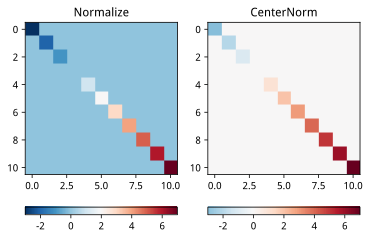

In [2]:
m = diag(arange(-5, 6)+2)
norms = [None, CenterNorm()]
titles = ["Normalize", "CenterNorm"]
fig, ax = subplots(1, 2)

for i in range(2):
    c = ax[i].imshow(m, cmap="RdBu_r", norm=norms[i]);
    ax[i].set_title(titles[i])
    plt.colorbar(c, ax=ax[i], orientation='horizontal');